In [20]:
# Loading Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

# Loading Dataset
engine_data = pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\Data_Analyst\Automotive_Vehicles_Engine\Dataset\cleaned_engine_data.csv')

In [21]:
engine_data["Timestamp"] = pd.to_datetime(engine_data["Timestamp"])
engine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   engine_rpm        19535 non-null  float64       
 1   lub_oil_pressure  19535 non-null  float64       
 2   fuel_pressure     19535 non-null  float64       
 3   coolant_pressure  19535 non-null  float64       
 4   lub_oil_temp      19535 non-null  float64       
 5   coolant_temp      19535 non-null  float64       
 6   engine_condition  19535 non-null  int64         
 7   temp_diff         19535 non-null  float64       
 8   pressure_ratio    19535 non-null  float64       
 9   Timestamp         19535 non-null  datetime64[ns]
 10  Hour              19535 non-null  int64         
 11  Day_of_week       19535 non-null  int64         
 12  Is_weekend        19535 non-null  int64         
dtypes: datetime64[ns](1), float64(8), int64(4)
memory usage: 1.9 MB


- Distribution of Variables

In [22]:
# Calculate Q1, Q3, and IQR for 'engine_rpm'
Q1 = engine_data['engine_rpm'].quantile(0.25)
Q3 = engine_data['engine_rpm'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = engine_data[engine_data['engine_rpm'] > upper_bound]

# Count and percentage of outliers
num_outliers = len(outliers)
percent_outliers = (num_outliers / len(engine_data)) * 100

# Group by hour to check if outliers occur more during certain hours of the day (e.g., during startup).
engine_data.groupby('Hour')['engine_rpm'].describe()

,count,mean,std,min,25%,50%,75%,max
Hour,,,,,,,,
0,840.0,792.277381,269.733901,84.0,593.50,742.5,938.00,1758.0
1,840.0,797.334524,273.001559,107.0,595.00,753.0,932.00,1776.0
2,840.0,801.127381,262.491009,362.0,614.50,763.0,934.25,1764.0
3,840.0,797.788095,264.238164,309.0,599.75,761.5,931.25,2151.0
4,840.0,793.490476,271.014234,290.0,597.00,752.0,935.25,2143.0
5,840.0,792.288095,255.571901,343.0,599.75,747.5,940.25,2085.0
6,840.0,788.730952,271.591366,355.0,583.00,737.5,925.50,1673.0
7,840.0,791.134524,260.482860,351.0,598.00,749.5,934.50,2022.0
8,840.0,794.823810,278.148565,282.0,586.50,750.0,945.25,2136.0


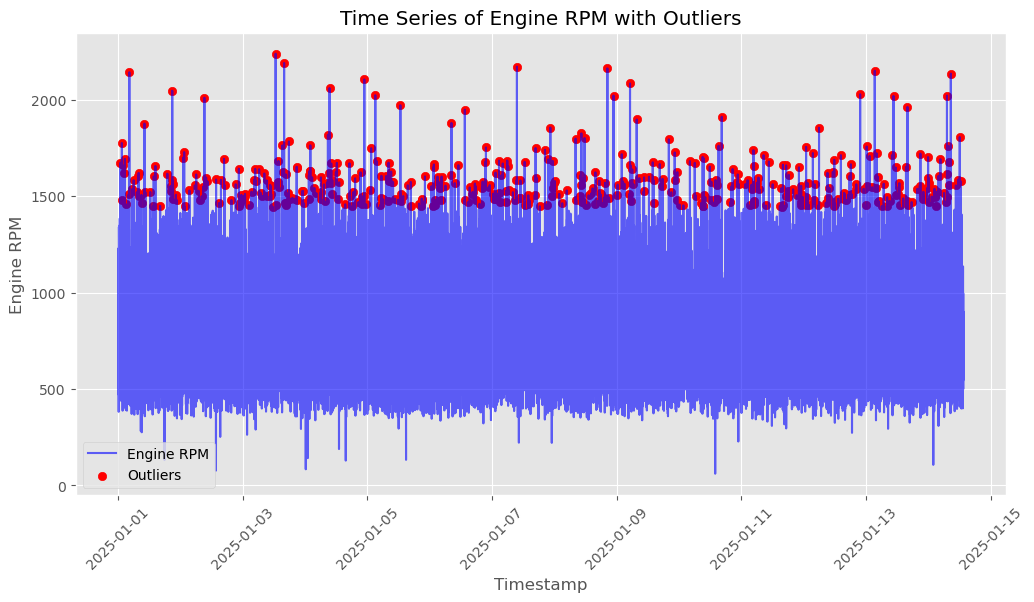

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(engine_data['Timestamp'], engine_data['engine_rpm'], label='Engine RPM', color='blue', alpha=0.6)
plt.scatter(outliers['Timestamp'], outliers['engine_rpm'], color='red', label='Outliers', marker='o')
plt.xlabel('Timestamp')
plt.ylabel('Engine RPM')
plt.title('Time Series of Engine RPM with Outliers')
plt.legend()
plt.xticks(rotation=45)
plt.show()


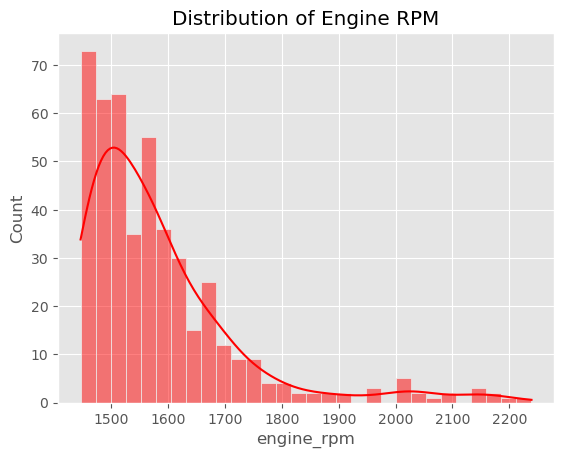

In [ ]:
# Use a histogram or KDE plot to see where outliers cluster.
sns.histplot(outliers['engine_rpm'], bins=30, kde=True, color='red')
plt.title('Distribution of Engine RPM')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_13752\990056482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['hour'] = outliers['Timestamp'].dt.hour


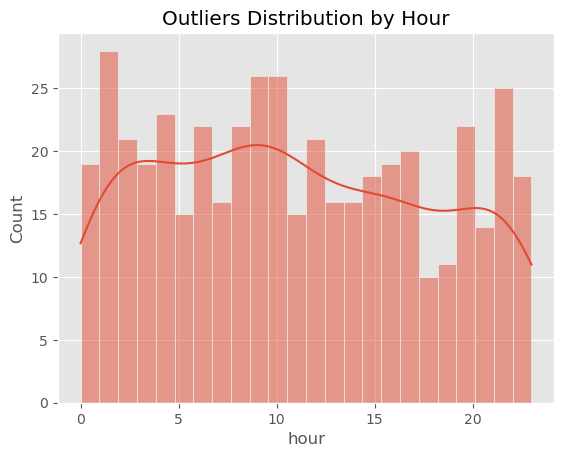

In [29]:
outliers['hour'] = outliers['Timestamp'].dt.hour
sns.histplot(outliers['hour'], bins=24, kde=True)
plt.title("Outliers Distribution by Hour")
plt.show()


- Correlation Analysis

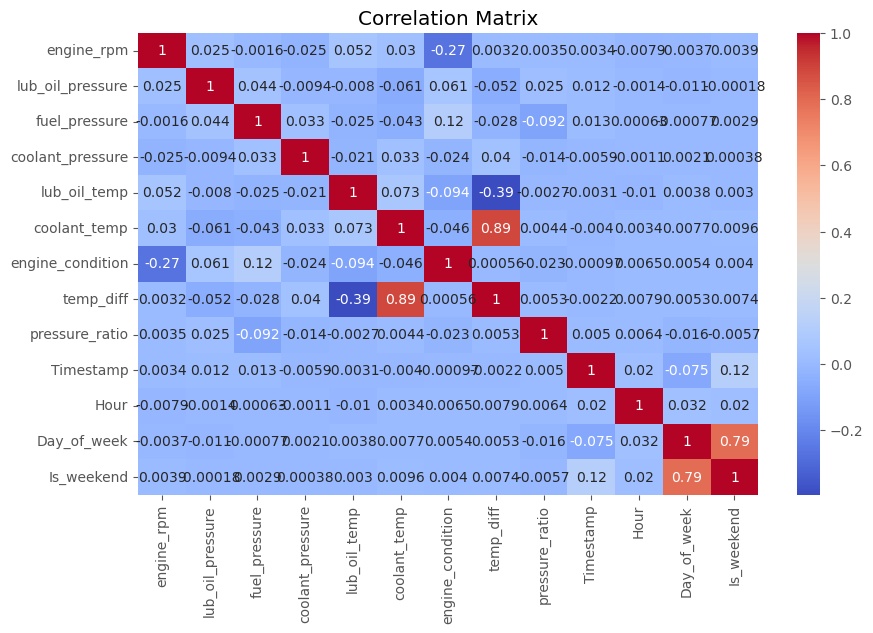

In [ ]:
# Heatmap of correlations
plt.figure(figsize=(10,6))
sns.heatmap(engine_data.corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()


- Anomaly Detection

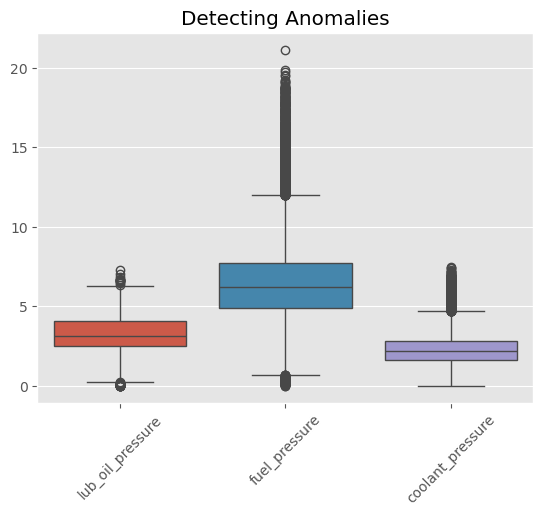

In [ ]:
sns.boxplot(data=engine_data[['lub_oil_pressure', 'fuel_pressure', 'coolant_pressure']])
plt.xticks(rotation=45)
plt.title('Detecting Anomalies')
plt.show()


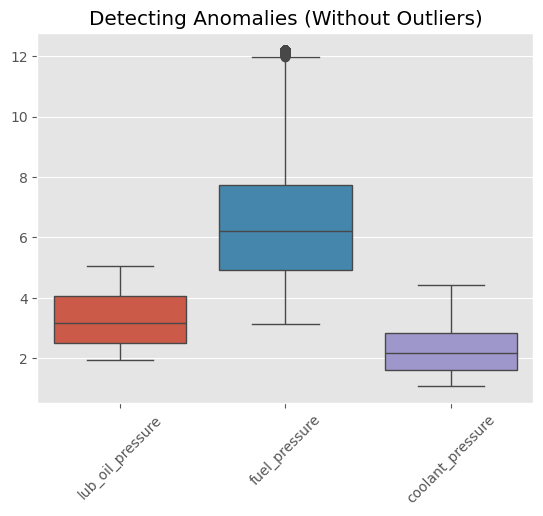

In [ ]:
from scipy.stats.mstats import winsorize

engine_data['fuel_pressure'] = winsorize(engine_data['fuel_pressure'], limits=[0.05, 0.05])  # Cap extreme 5% values
engine_data['lub_oil_pressure'] = winsorize(engine_data['lub_oil_pressure'], limits=[0.05, 0.05])  # Cap extreme 5% values
engine_data['coolant_pressure'] = winsorize(engine_data['coolant_pressure'], limits=[0.05, 0.05])  # Cap extreme 5% values

sns.boxplot(data=engine_data[['lub_oil_pressure', 'fuel_pressure', 'coolant_pressure']])
plt.xticks(rotation=45)
plt.title('Detecting Anomalies (Without Outliers)')
plt.show()
